<a href="https://colab.research.google.com/github/xuanthang482/CS114.K21/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import các thư viện cần thiết ,model , hàm chia data , hàm tính sai số

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Lấy dữ liệu xuống thế nào?

load dữ liệu từ url , dùng hàm read_csv để đọc data

In [38]:
dataset = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names =['size', 'time'] )

in ra 10 dòng đầu của dataset

In [39]:
dataset.head(10)

,size,time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977
5,1355574,0.098012
6,725488,0.048238
7,1191887,0.089304
8,4556292,0.378561
9,9989596,0.832734


In [40]:
dataset.shape

(71115, 2)

Chọn model và train thế nào? 



In [41]:
# Chia data theo tỉ lệ 8/2
X = dataset['size']
y = dataset['time']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1)
#vì data chỉ có 1 cột nên phải reshape
X_train = X_train.values.reshape(-1,1)
X_validation = X_validation.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)
Y_validation = Y_validation.values.reshape(-1,1)


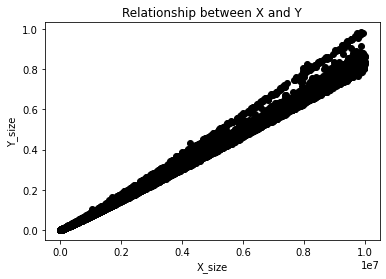

In [42]:
X_size = dataset['size']
y_size = dataset['time']
plt.title('Relationship between X and Y')
plt.scatter(X_size, y_size,  color='black')
plt.xlabel('X_size')
plt.ylabel('Y_size')
plt.show()


Viết ứng dụng thực hiện việc predict cho một mẫu dữ liệu mới thế nào?

*   Tạo ra 1 mẫu dữ liệu mới bằng biến test
*   Cho test vô model để dự đoán



In [43]:
test = [[int(input("nhap vao gia tri size can predict : "))]]
model = LinearRegression()
model.fit(X_train,Y_train)
pre=model.predict(X_validation)
result=mean_absolute_error(pre, Y_validation)
print(result)
a = model.predict(test)
print(a)

nhap vao gia tri size can predict : 12345
0.00831551754510758
[[-0.01486992]]


Khả năng dự đoán của ứng dụng là tốt hay không? Làm sao biết?

*   Khả năng dự đoán của model là tốt
*   Ở bước đánh giá model đã đánh giá giá trị mean absolute error của model linear regression là rất thấp ~ 0.0083



ROUND 3


load bộ data 3 bằng read_csv

In [51]:
dataset3 = pd.read_csv("http://cs.uit.edu.vn/data3.txt",sep=",", names =['size', 'time'] )

In [52]:
dataset3.head(10)

,size,time
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831
5,30423112,2.61376
6,21881189,1.85961
7,35810179,3.14761
8,35355055,3.07585
9,29399699,2.56714


in ra các chiều của dataset3

In [53]:
dataset3.shape

(10590, 2)

In [54]:
X_3 = dataset3['size']
y_3 = dataset3['time']

In [55]:
X_3 = X_3.values.reshape(-1,1)
y_3 = y_3.values.reshape(-1,1)

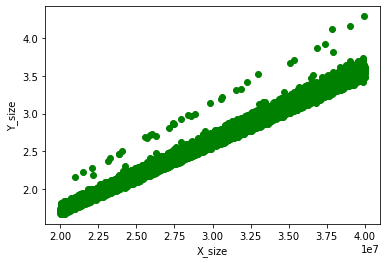

In [57]:
X_size = dataset3['size']
y_size = dataset3['time']
plt.scatter(X_size, y_size,  color='green')
plt.xlabel('X_size')
plt.ylabel('Y_size')
plt.show()


In [58]:
y_3_predict = model.predict(X_3)
results = mean_absolute_error(y_3,y_3_predict)
results

0.12275577157511128

Kết quả tệ hơn với Data 3, Do data này có shape nhỏ hơn dataset1 , có nhiều điểm dữ kiệu gây nhiễu hơn tức là những điểm ỏ xa hơn so với những điểm còn lại

Xây dựng model mới sử dụng phương pháp tăng số features

In [26]:
dataset3['size**2']=dataset3['size']*dataset3['size']
dataset3['size.log(size)']=dataset3['size']*np.log10(dataset3['size'])
columns_titles = ["size","size**2","size.log(size)","time"]
dataset3=dataset3.reindex(columns=columns_titles)


In [27]:
dataset3.head(10)

,size,size**2,size.log(size),time
0,37837612,1431684881862544,2.867305e+08,4.12166
1,37395246,1398404423400516,2.831873e+08,3.92089
2,36610827,1340352653623929,2.769100e+08,3.21540
3,29555651,873536506033801,2.207996e+08,2.54506
4,25928216,672272384942656,1.922259e+08,2.21831
5,30423112,925565743764544,2.276623e+08,2.61376
6,21881189,478786432053721,1.606095e+08,1.85961
7,35810179,1282368920012041,2.705103e+08,3.14761
8,35355055,1249979914053025,2.668759e+08,3.07585
9,29399699,864342301290601,2.195670e+08,2.56714


In [32]:
# vẫn chia data 0.65/0.35
array = dataset3.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.35 , random_state=1)

tăng test sizelên 0,35 cho độ chính xác cao hơn so với 0,2

In [33]:
model_new = LinearRegression()
model_new.fit(X_train,Y_train)
y_predict = model_new.predict(X_validation)
results = mean_absolute_error(Y_validation,y_predict)
results 

0.04259001707585436

Model mới có performance tốt hơn model cũ (0.0425 so với 0.122)

Do sử dụng nhiểu feature , bộ tham số có nhiều thành phần hơn nên độ mất mát sẽ được giảm xuống 